#### Introduction

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

In [22]:
## Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

In [3]:
## Check if the data is loaded properly

os.chdir("F:/Linear Regression/Dataset/bike-sharing-demand")
trainDF = pd.read_csv("train.csv")
testDF = pd.read_csv("test.csv")

trainDF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
## Number of columns and rows
print(trainDF.shape)
print(testDF.shape)

(10886, 12)
(6493, 9)


In [4]:
## Data cleaning 

## Separately store year, month, day, hour, and day values in columns
trainDF['datetime'] = pd.to_datetime(trainDF['datetime'])
testDF['datetime'] = pd.to_datetime(testDF['datetime'])

## extracting day, month, year and hour in separate columns
trainDF['year'] = trainDF['datetime'].apply(lambda x: x.year)
trainDF['month'] = trainDF['datetime'].apply(lambda x: x.month)
trainDF['day'] = trainDF['datetime'].apply(lambda x: x.day)
trainDF['hour'] = trainDF['datetime'].apply(lambda x: x.hour)

testDF['year'] = testDF['datetime'].apply(lambda x: x.year)
testDF['month'] = testDF['datetime'].apply(lambda x: x.month)
testDF['day'] = testDF['datetime'].apply(lambda x: x.day)
testDF['hour'] = testDF['datetime'].apply(lambda x: x.hour)

In [13]:
testDF.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013,2011,1,20,5
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013,2011,1,20,6
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013,2011,1,20,7
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012,2011,1,20,8
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013,2011,1,20,9


In [14]:
trainDF.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9


In [5]:
## as we can see the test data doesn't have the columns registered or casual and we don't need datetime as we have separated; 
## we will drop them

testDF.drop(['datetime'], axis = 1, inplace = True)
trainDF.drop(['datetime', 'casual', 'registered'], axis = 1, inplace = True)

In [7]:
testDF.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4
5,1,0,1,1,9.84,11.365,60,15.0013,2011,1,20,5
6,1,0,1,1,9.02,10.605,60,15.0013,2011,1,20,6
7,1,0,1,1,9.02,10.605,55,15.0013,2011,1,20,7
8,1,0,1,1,9.02,10.605,55,19.0012,2011,1,20,8
9,1,0,1,2,9.84,11.365,52,15.0013,2011,1,20,9


In [8]:
trainDF.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
5,1,0,0,2,9.84,12.880,75,6.0032,1,2011,1,1,5
6,1,0,0,1,9.02,13.635,80,0.0000,2,2011,1,1,6
7,1,0,0,1,8.20,12.880,86,0.0000,3,2011,1,1,7
8,1,0,0,1,9.84,14.395,75,0.0000,8,2011,1,1,8
9,1,0,0,1,13.12,17.425,76,0.0000,14,2011,1,1,9


In [9]:
## Check for missing values

print(testDF.isnull().sum())
print(trainDF.isnull().sum())

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
year          0
month         0
day           0
hour          0
dtype: int64
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
year          0
month         0
day           0
hour          0
dtype: int64


In [10]:
## We can clearly see that there are no missing values; so lets make charts to understand each feature in our data set

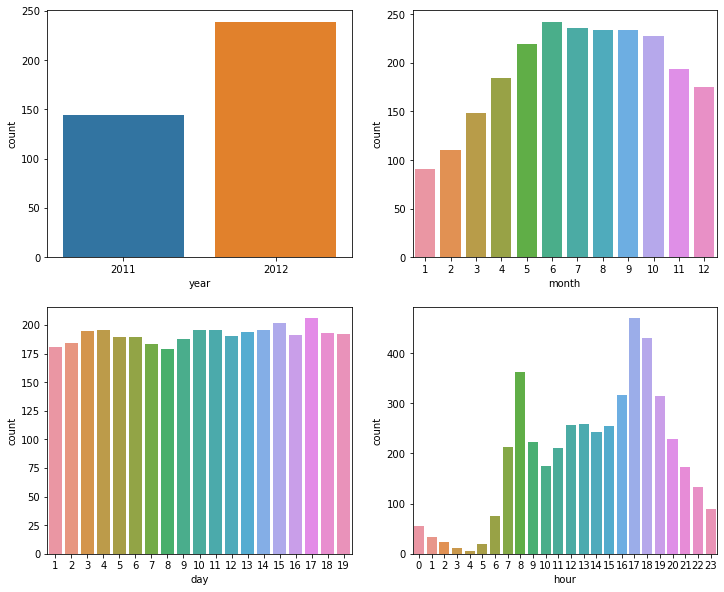

In [23]:
## EDA

fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x = 'year', y = 'count', data = trainDF.groupby('year')['count'].mean().reset_index())

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x = 'month', y = 'count', data = trainDF.groupby('month')['count'].mean().reset_index())

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x = 'day', y = 'count', data = trainDF.groupby('day')['count'].mean().reset_index())

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x = 'hour', y = 'count', data = trainDF.groupby('hour')['count'].mean().reset_index())

From the above charts following assumptions can be made:

1. The year 2012 saw a significant rise in rental counts; mostly because of increase in overall popularity. It is safe to assume that from 2012 onwards we can see a good rise.
2. The seasons in South Korea have a good impact in the counts. We can see that from March to May there is a slow climb in the counts; as there is a spring season and it is safe to assume for leisure people would love to ride their bicycles. From June till August we can see almost no change in counts as there is summer season and its good to head out fresh and its a great way to exercise and burn calories. The count is still stagnant through October and that marks the end or atleast towards the end of Autumn season and then we see a slow decline as winter hits Korea. 
3. The deviation in days is not far off, it might mean people who bicycle daily will continue to do so
4. We see spikes at 7, 17 & 18th hours, and that might be due to traffic rush

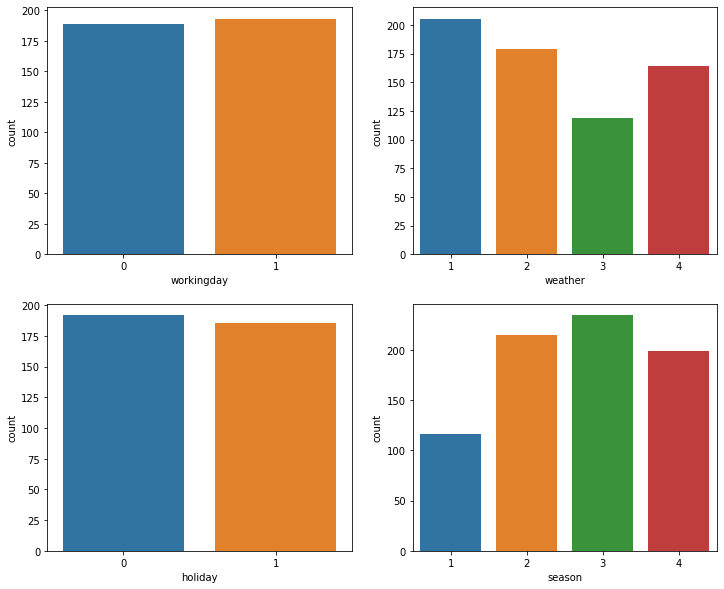

In [24]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x = 'workingday', y = 'count', data = trainDF.groupby('workingday')['count'].mean().reset_index())

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x = 'weather', y = 'count', data = trainDF.groupby('weather')['count'].mean().reset_index())

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x = 'holiday', y = 'count', data = trainDF.groupby('holiday')['count'].mean().reset_index())

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x = 'season', y = 'count', data = trainDF.groupby('season')['count'].mean().reset_index())

From the above charts following conclusions can be drawn:

1. Working day(1 = Working day, 0 = Not a working day) have little to no impact and this same goes for holidays. Assumption might be that people who have a habit of cycling will use it for their chores; if needed, or for leisure and/or exercising.
2. Winter can see the worst counts, while Autumn is the highest followed by Summer and then spring
3. Cycles rental counts in sunny weather is high as opposed to bad weathers

In [25]:
## Cleaning data 

## There are no missing values; however there are windspeed = 0. This is not supposed to happen as there is always some windspeed
## while riding
## Plotting a graph to check the wind speeds

trainDF['windspeed'].value_counts()


0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

<AxesSubplot:title={'center':'Test Data Windspeed'}, xlabel='windspeed', ylabel='count'>

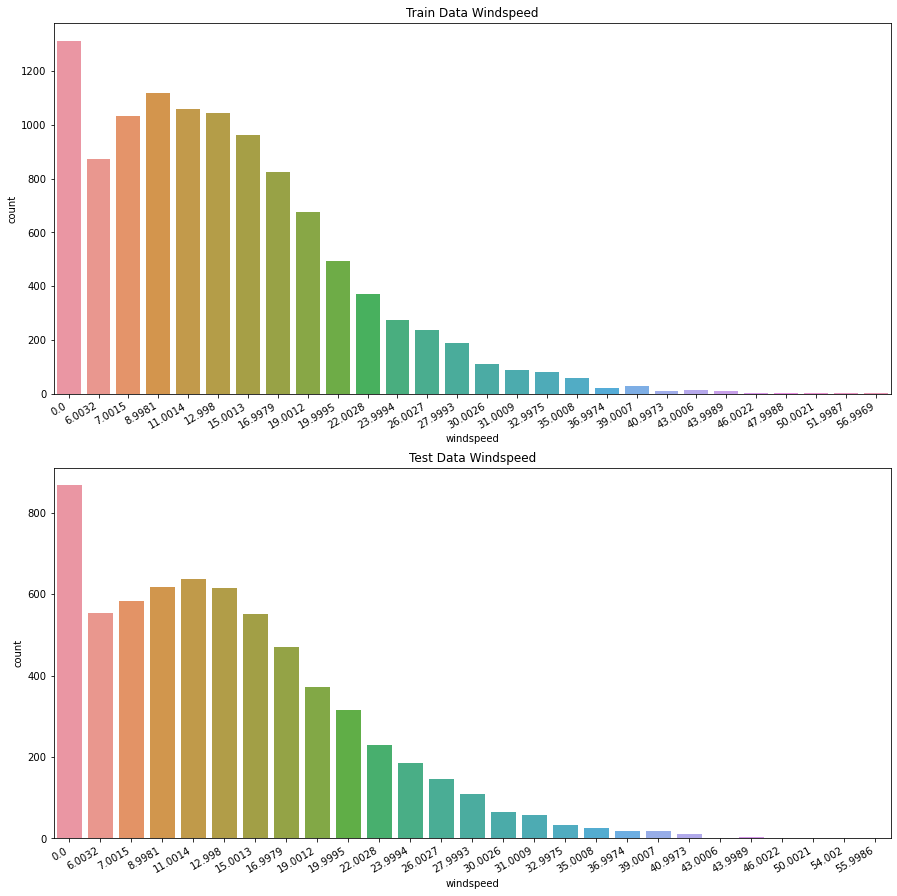

In [27]:
## Clearly can be seen 1313 entries have 0.00 Windspeed.

fig, axes = plt.subplots(nrows = 2)
fig.set_size_inches(15,15)

plt.sca(axes[0])
plt.xticks(rotation = 30, ha = 'right')
axes[0].set(ylabel = 'count', title = "Train Data Windspeed")
sns.countplot(data = trainDF, x = 'windspeed', ax = axes[0])

plt.sca(axes[1])
plt.xticks(rotation = 30, ha = 'right')
axes[1].set(ylabel = 'count', title = "Test Data Windspeed")
sns.countplot(data = testDF, x = 'windspeed', ax = axes[1])

In [28]:
## to fix the above issue, which will hamper our model. We will replace 0.00 with the average of the windspeed column

trainDF.loc[trainDF['windspeed'] == 0, "windspeed"] = trainDF['windspeed'].mean()
testDF.loc[testDF['windspeed'] == 0, "windspeed"] = testDF['windspeed'].mean()

<AxesSubplot:title={'center':'Test Data Windspeed'}, xlabel='windspeed', ylabel='count'>

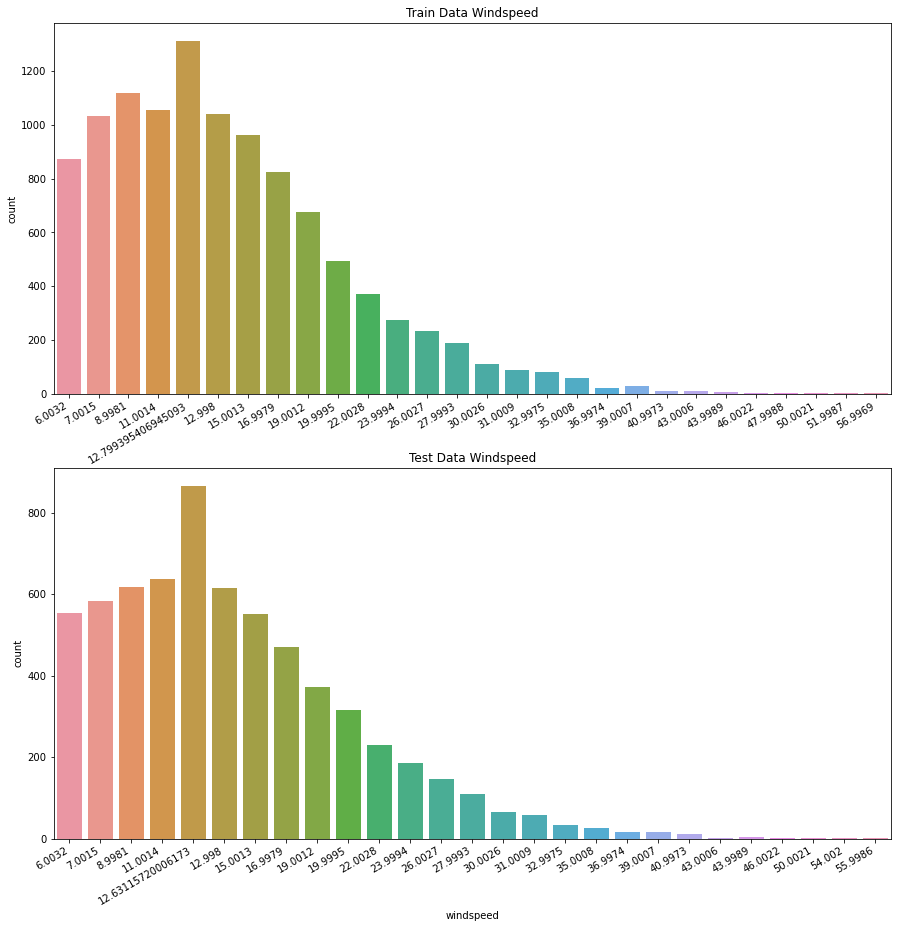

In [29]:
## Checking the graph after implementing the above solution
fig, axes = plt.subplots(nrows = 2)
fig.set_size_inches(15,15)

plt.sca(axes[0])
plt.xticks(rotation = 30, ha = 'right')
axes[0].set(ylabel = 'count', title = "Train Data Windspeed")
sns.countplot(data = trainDF, x = 'windspeed', ax = axes[0])

plt.sca(axes[1])
plt.xticks(rotation = 30, ha = 'right')
axes[1].set(ylabel = 'count', title = "Test Data Windspeed")
sns.countplot(data = testDF, x = 'windspeed', ax = axes[1])

C:\Users\musta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

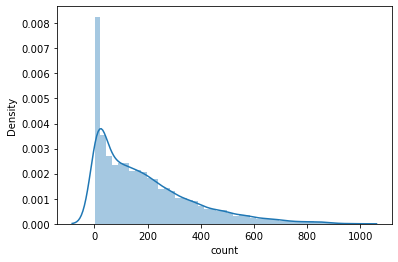

In [32]:
## To check if 'count' in 'Train' is normally distributed or not. If the target variable (y) is normally distributed then it will help us make better model and hence get better results
## For instance, a skewed distribution will lead to high MSE values due to cases located on the other side of the distribution, while the MSE is limited if the data is transformed to a normal distribution.

sns.distplot(trainDF['count'])

C:\Users\musta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

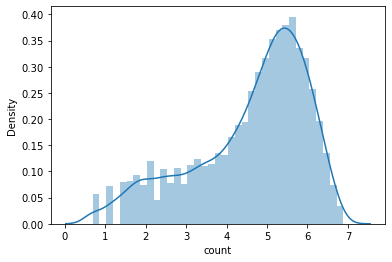

In [33]:
## The count is not normally distributed
## We will apply log transformation ny using numpy

sns.distplot(np.log1p(trainDF['count']))

In [39]:
## Even though its not a normally distributed graph, the skewness is reduced, which will intern help out model

## the value in column 'count' before transformation:

print(trainDF['count'])

0        1.343703
1        1.550446
2        1.503301
3        1.291725
4        0.526589
           ...   
10881    1.919872
10882    1.870099
10883    1.813178
10884    1.769435
10885    1.702680
Name: count, Length: 10886, dtype: float64


In [40]:
 ## ## The value after apply log transformation

trainDF['count'] = np.log1p(trainDF['count'])
print(trainDF['count'])

0        0.851732
1        0.936268
2        0.917610
3        0.829305
4        0.423036
           ...   
10881    1.071540
10882    1.054346
10883    1.034315
10884    1.018643
10885    0.994244
Name: count, Length: 10886, dtype: float64
